# Task 8: K-Means Clustering Analysis on Mall Customers Dataset

### Objective
This notebook performs K-Means clustering on the Mall Customers dataset to identify customer segments based on Annual Income and Spending Score.
This notebook walks through the following steps:
1. Load and visualize dataset (optional PCA for 2D view).
2. Fit K-Means and assign cluster labels.
3. Use the Elbow Method to find optimal K.
4. Visualize clusters with color-coding.
5. Evaluate clustering using Silhouette Score.

### Tools Used
- Scikit-learn
- NumPy
- Matplotlib
- Seaborn
- Pandas
- Seaborn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

### 1: Dataset Overview and Initial Exploration

We begin by loading the `Mall_Customers.csv` dataset and exploring its structure, data types, and basic statistics.

#### Dataset Information:
- The dataset contains **200 entries** and **5 columns**.
- Column descriptions:
  - `CustomerID`: Unique identifier for each customer (int64).
  - `Gender`: Gender of the customer (object - categorical).
  - `Age`: Age of the customer (int64).
  - `Annual Income (k$)`: Customer’s annual income in thousands of dollars (int64).
  - `Spending Score (1-100)`: Score assigned by the mall based on customer behavior and spending nature (int64).

#### Summary Statistics:
- **Age** ranges from 18 to 70 years, with a mean of **38.85** and standard deviation of **13.97**.
- **Annual Income** ranges from 15k$ to 137k$, with a mean of **60.56k$** and standard deviation of **26.26k$**.
- **Spending Score** ranges from 1 to 99, with a mean of **50.2** and standard deviation of **25.82**.

#### Missing Values:
- No missing values are present in the dataset. All columns have 200 non-null entries.


In [42]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.75000

### 2: Gender Distribution

The bar plot above shows the distribution of customers based on gender.

- There are **more female customers** than male customers in the dataset.
- This categorical feature (`Gender`) can be useful for segmenting customers based on gender-based spending behavior or preferences.
- Exact counts:
  - **Female**: 112
  - **Male**: 88

This insight helps in understanding the customer base composition and could be relevant in targeted marketing strategies.


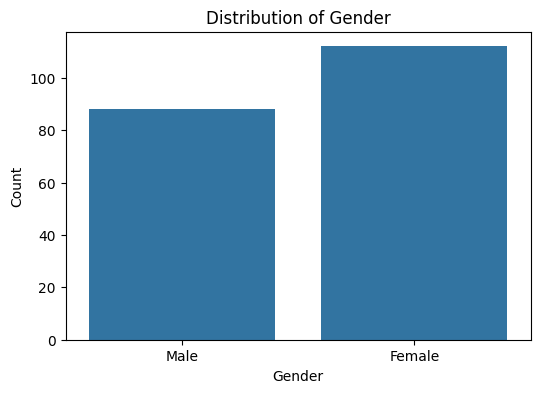

In [44]:
# Plot Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 3. Distribution and Summary of Numerical Variables

**Histograms:**  
The histograms illustrate the frequency distribution of three important numerical features in the dataset — *Age*, *Annual Income (k$)*, and *Spending Score (1-100)*. These plots help us understand how the values of these variables are spread across the dataset. For example, we can observe the common age groups of customers, their income ranges, and their spending score patterns.

**Histogram Observations:**
- **Age Distribution:** Most customers are between 20 and 40 years old, with peaks around ages 32 and 47. The distribution is right-skewed, with fewer customers above 60.
- **Annual Income Distribution:** The income values are fairly spread, with many customers earning between \$40k and \$80k. A secondary mode exists around \$60k.
- **Spending Score Distribution:** Spending scores are distributed across the full 0–100 range, but there's clustering between 40–60 and 70–90, suggesting the presence of distinct customer behavior groups.

**Boxplots:**  
Boxplots summarize the central tendency, dispersion, and potential outliers for the numerical variables.

**Boxplot Observations:**
- **Age Boxplot:** The median age is around 36. Most data lies between 28 and 50 years, with no significant outliers.
- **Annual Income Boxplot:** The median income is just above \$60k. There's a noticeable outlier above \$130k, and the IQR ranges from about \$40k to \$78k.
- **Spending Score Boxplot:** The median score is about 50. The distribution is symmetric with a wide range and no significant outliers. Most values fall between 30 and 75.

Together, these visualizations offer insights into the distribution, variability, and possible anomalies in the dataset. This is useful for guiding further analysis, feature engineering, and clustering tasks.


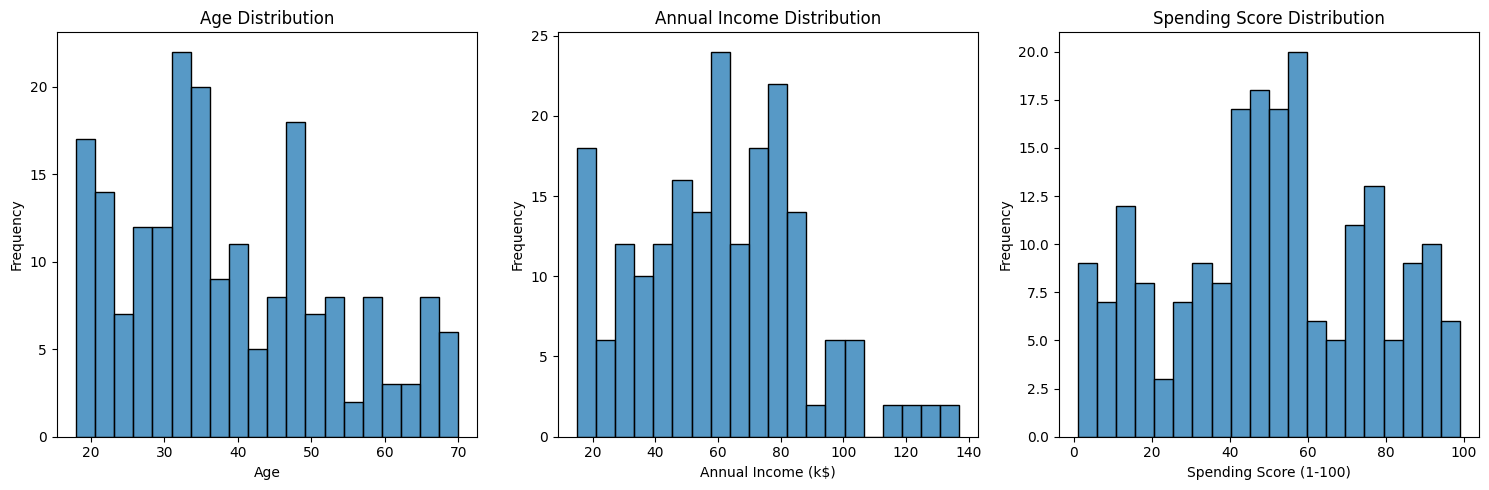

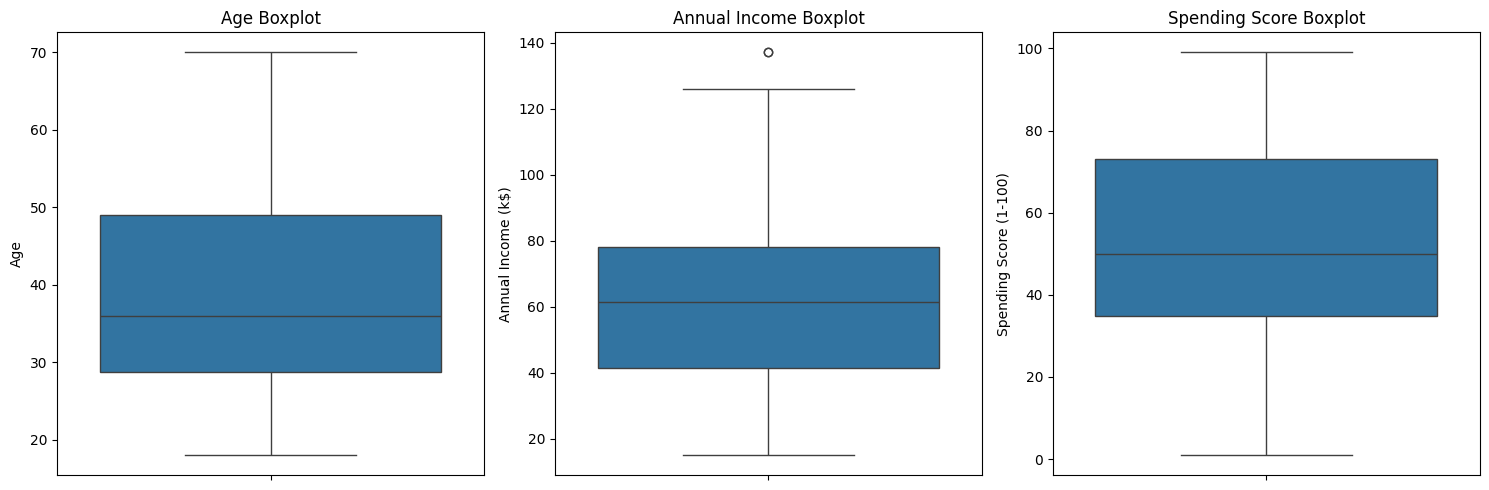

In [45]:
# Plot histograms for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['Age'], bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Annual Income (k$)'], bins=20, ax=axes[1])
axes[1].set_title('Annual Income Distribution')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Spending Score (1-100)'], bins=20, ax=axes[2])
axes[2].set_title('Spending Score Distribution')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplots for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y='Age', data=data, ax=axes[0])
axes[0].set_title('Age Boxplot')
sns.boxplot(y='Annual Income (k$)', data=data, ax=axes[1])
axes[1].set_title('Annual Income Boxplot')
sns.boxplot(y='Spending Score (1-100)', data=data, ax=axes[2])
axes[2].set_title('Spending Score Boxplot')
plt.tight_layout()
plt.show()

### 4.Pairwise Relationships

**Pairplot:**  
The pairplot provides scatterplots and histograms to analyze relationships between pairs of numerical variables:

- **Age vs. Annual Income:** No strong linear relationship; income is spread across all ages.
- **Age vs. Spending Score:** No clear trend, though some younger customers show both high and low spending scores.
- **Annual Income vs. Spending Score:** Appears to show potential clusters — useful for customer segmentation.

This visualization is useful to observe correlations, clusters, and data distribution patterns.

---

### Gender-wise Distribution

**Boxplots by Gender:**  
These boxplots help compare *Age*, *Annual Income*, and *Spending Score* distributions between male and female customers.

- **Age by Gender:** Distributions are quite similar, with slightly higher median age for males.
- **Annual Income by Gender:** Similar distribution for both genders. A high-income outlier appears among males.
- **Spending Score by Gender:** Females tend to have slightly higher and more consistent spending scores compared to males.
These gender-wise insights are helpful for demographic analysis and tailoring marketing strategies.
---
Together, these visualizations provide a comprehensive understanding of the customer dataset's distribution patterns, relationships, and demographic differences.


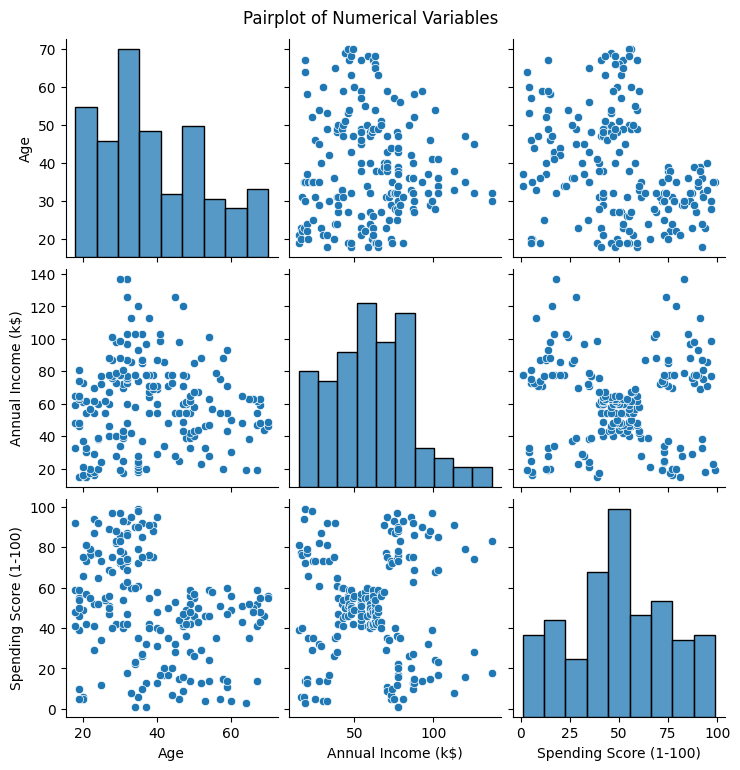

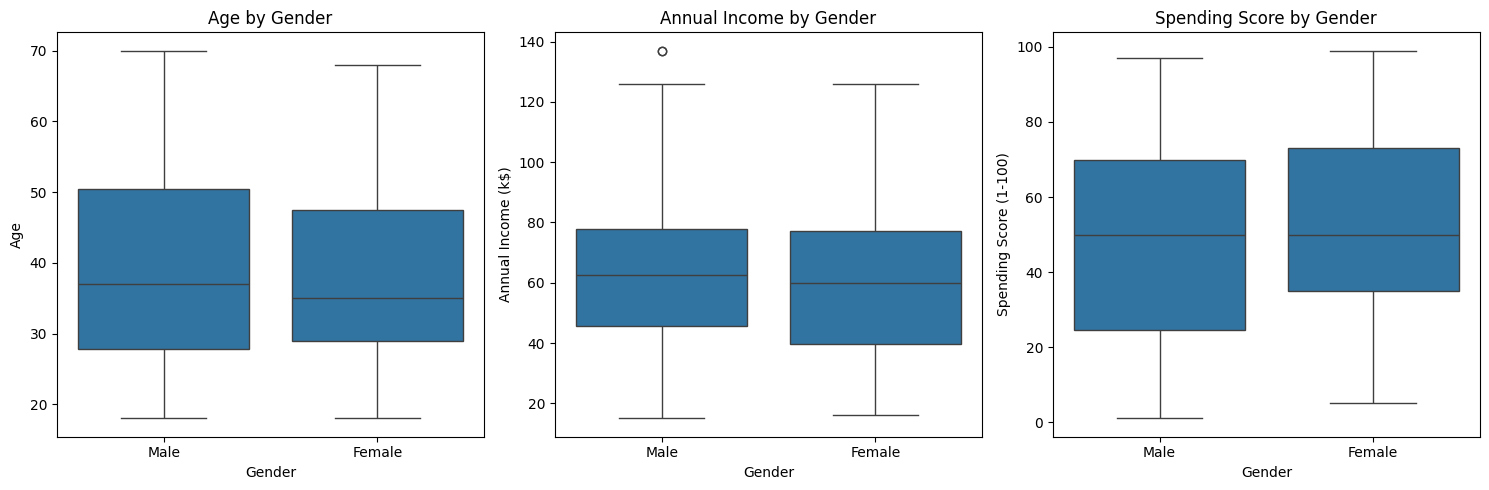

In [46]:
# Pairplot for numerical variables
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Boxplots to compare variables by Gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='Gender', y='Age', data=data, ax=axes[0])
axes[0].set_title('Age by Gender')
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=axes[1])
axes[1].set_title('Annual Income by Gender')
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, ax=axes[2])
axes[2].set_title('Spending Score by Gender')
plt.tight_layout()
plt.show()

### 5.Correlation Matrix

The correlation matrix shows the linear relationships between numerical variables in the dataset: **Age**, **Annual Income (k$)**, and **Spending Score (1-100)**.

#### Key Observations:

- **Age vs. Spending Score:**  
  There is a moderate **negative correlation** of **-0.33**, suggesting that younger customers tend to have higher spending scores, while older customers spend less.

- **Age vs. Annual Income:**  
  A near-zero correlation (**-0.012**) indicates no significant linear relationship between age and annual income.

- **Annual Income vs. Spending Score:**  
  The correlation is approximately **0.0099**, indicating **almost no linear relationship** between a customer's income and how much they spend.

#### Conclusion:
The variables are largely uncorrelated, except for a mild inverse relationship between **Age** and **Spending Score**. This insight can be crucial when performing clustering or segmentation, as it suggests that simple income or


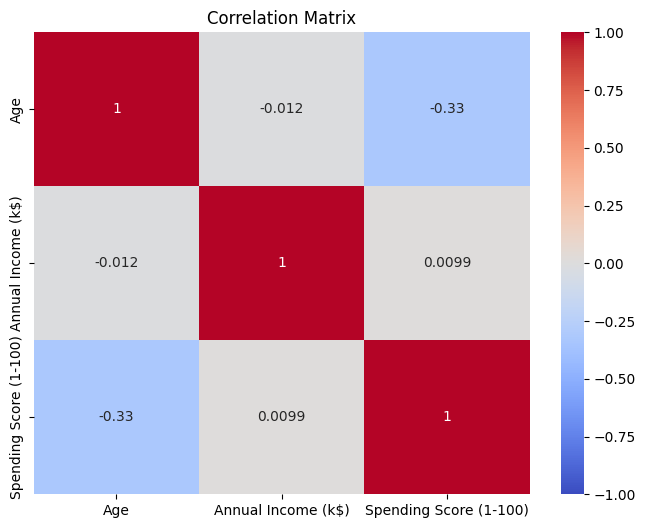

In [47]:
# Correlation matrix
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 6.PCA Visualization of the Dataset

To better understand the structure of the dataset before applying clustering, **Principal Component Analysis (PCA)** was used for dimensionality reduction and visualization.

#### Key Steps:

- **Selected Features:**  
  Only two features were selected for clustering — `Annual Income (k$)` and `Spending Score (1-100)` — as they are most relevant for customer segmentation.

- **Standardization:**  
  The features were standardized using `StandardScaler` to ensure each feature contributes equally to PCA and distance-based clustering.

- **PCA Transformation:**  
  PCA was applied to reduce the feature space to **two principal components**. This helps visualize potential clusters in a 2D plot.

#### Insights from the PCA Plot:

- The scatter plot displays customers as points in the new 2D space.
- There appear to be **distinct groupings** or **clusters**, indicating potential customer segments based on income and spending behavior.
- These clusters provide a **visual cue** that clustering algorithms like K-Means could perform well on this dataset.

This dimensionality reduction is purely for visualization; clustering will still be performed on the full feature set.


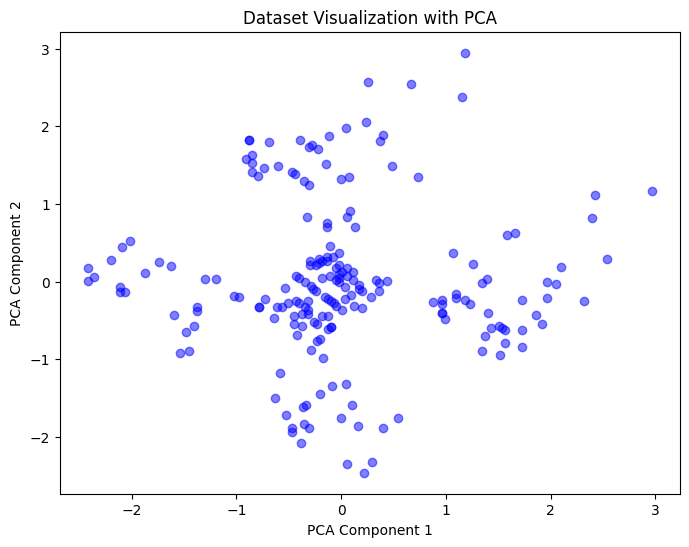

In [ ]:
# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize Dataset with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('Dataset Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



### 7.Elbow Method for Determining Optimal Number of Clusters (K)

To identify the ideal number of clusters for K-Means, the **Elbow Method** was applied. This method helps determine the value of **K** where adding more clusters doesn’t significantly reduce the within-cluster **inertia (sum of squared distances)**.

#### Process:

- A range of K values from 1 to 10 was evaluated.
- For each K, K-Means clustering was performed, and the corresponding **inertia** was recorded.
- The inertia values were then plotted against the number of clusters.

#### Insights from the Plot:

- The plot shows a **sharp drop in inertia** from K=1 to K=5.
- After K=5, the reduction in inertia becomes more gradual, forming a noticeable “**elbow**” around **K = 5**.
- This indicates that **5 clusters** is likely an optimal choice, as increasing K beyond this point leads to diminishing returns in reducing inertia.

Thus, based on the Elbow Method, **K = 5** is selected for clustering in the next step.


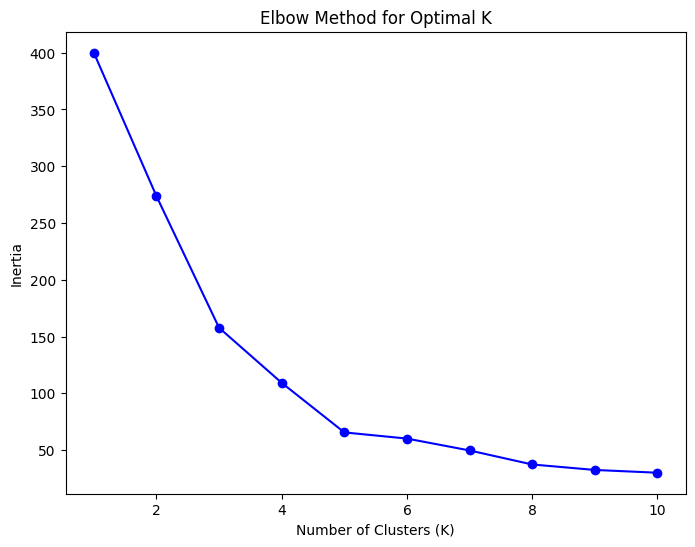

In [49]:
#  Elbow Method for Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



### 8.K-Means Clustering and Visualization

In this step, we apply the K-Means clustering algorithm with the optimal number of clusters (`k=5`), which was determined earlier using the Elbow Method.

- **Fitting the model:** We initialize the K-Means model with `n_clusters=5` and a fixed random state for reproducibility. The `fit_predict` method fits the model to the standardized data (`X_scaled`) and assigns cluster labels to each data point.

- **Assigning cluster labels:** The resulting cluster labels are added as a new column `'Cluster'` to a copy of the original dataframe. This helps track which data point belongs to which cluster.

- **Visualization:** A scatter plot is created where each point represents a customer, plotted by their standardized Annual Income (x-axis) and Spending Score (y-axis). Points are colored by their assigned cluster.

- **Centroids:** The cluster centroids are marked with large red 'X' markers to indicate the center of each cluster.

This visualization reveals five distinct customer groups based on income and spending patterns, aiding in customer segmentation and targeted marketing strategies.

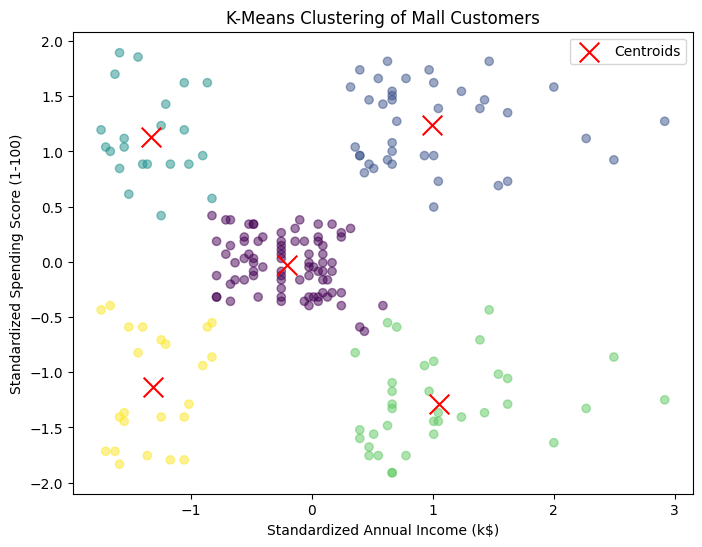

In [ ]:
#  Fit K-Means and Assign Cluster Labels
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the  dataframe .I make a copy of datafrmae.
df = data
df['Cluster'] = cluster_labels

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Standardized Annual Income (k$)')
plt.ylabel('Standardized Spending Score (1-100)')
plt.legend()
plt.show()

### 9.Evaluate Clustering with Silhouette Score

To evaluate the quality of the K-Means clustering, we compute the **Silhouette Score**, which measures how well each data point fits within its assigned cluster compared to other clusters.

- The **Silhouette Score** ranges from **-1 to 1**:
  - **+1** indicates the data point is well matched to its own cluster and poorly matched to neighboring clusters.
  - **0** means the data point is on or very close to the decision boundary between two neighboring clusters.
  - **Negative values** indicate the point might have been assigned to the wrong cluster.

We calculate the Silhouette Score using the `silhouette_score()` function from `sklearn.metrics`, based on the standardized data `X_scaled` and the predicted cluster labels:

- Result:
    Silhouette Score for K=5 is 0.555

- Interpretation:A Silhouette Score of 0.555 indicates that the clusters are fairly well-separated and the clustering structure is reasonably strong. It validates that k=5 is an effective choice, with distinct customer segments based on their income and spending patterns.


In [51]:
# Evaluate Clustering with Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')

Silhouette Score for K=5: 0.555
